In [1]:
import os
import numpy as np
import seaborn as sns
sns.set_context('talk')

from borfr import BO_RFR
import warnings
warnings.filterwarnings("ignore")

# 1D fully sequential

In [2]:
Bounds = np.load('systems_1d/Bounds.npy')
Coefs = np.load('systems_1d/Coefs.npy')
X_inits = np.load('systems_1d/X_inits.npy')
y_inits = np.load('systems_1d/y_inits.npy')


i = 50
bound = Bounds[i]
coefs = Coefs[i]
X_init = X_inits[i]
y_init = y_inits[i].ravel()

def get_label(x):
    if x>bound:
        return 0
    else:
        return 1
        
def f(x, fac = 0.001):
    labels = np.array([get_label(xi) for xi in x])
    res = np.zeros(x.shape)
    res[labels==0] = coefs[0]*(x[labels==0]-coefs[4])**coefs[2] - coefs[3]
    res[labels==1] = coefs[1]*(x[labels==1]-coefs[5])**coefs[6] - coefs[7]
    return res + np.random.randn(*x.shape)*fac

grid = np.linspace(4,14,100)
x_test = np.linspace(4,14,20)

In [3]:
bor = BO_RFR(X_init.reshape(-1,1), y_init, grid.reshape(-1,1), f, x_test.reshape(-1,1), est_labels='known', gl=get_label,
            cl_weight=.3)
bor.run(10)

generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 27485.61it/s]

running iterative exploration:


AttributeError: 'RegressorTags' object has no attribute 'multi_label' and no __dict__ for setting new attributes

AttributeError: 'BO_RFR' object has no attribute 'labels'

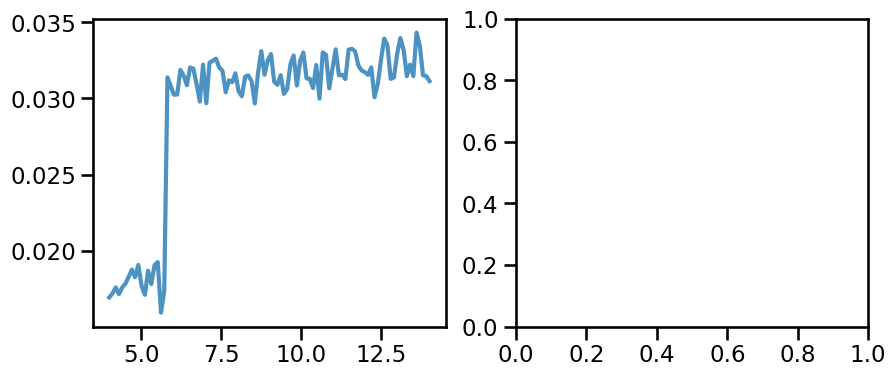

In [4]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(ncols=2, figsize=(10,4))
ax = axes.ravel()[0]
ax.plot(grid, f(grid),lw=3,alpha=0.8, label='experiment')
ax.scatter(bor.X, bor.y, ec='k',s=50, zorder=10, label='data', c=bor.labels)
ax.plot(grid,bor.model.predict(grid.reshape(-1,1)),lw=3,alpha=0.8, label='prediction')
ax.legend()
ax.set_title('Model prediction after %i Iterations\nR$_2$ score = %.3f'%(bor.n_iters, bor.get_r2()))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax = axes.ravel()[1]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
plt.tight_layout()

generating test data


100%|████████████████████████████████████████| 20/20 [00:00<00:00, 34606.47it/s]

running iterative exploration:



100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.77it/s]


Text(0, 0.5, 'R$_2$ score')

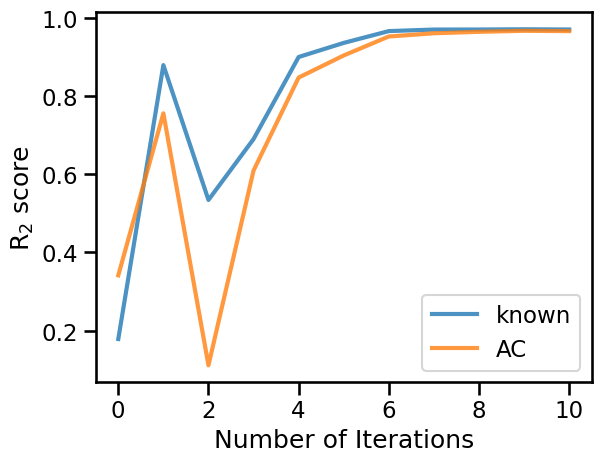

In [5]:
bor_ac = BO_RFR(X_init.reshape(-1,1), y_init, grid.reshape(-1,1), f, x_test.reshape(-1,1), est_labels='AC', gl=get_label)
bor_ac.run(10)

fig,ax = plt.subplots()
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8, label='known')
ax.plot(np.arange(bor_ac.n_iters+1),bor_ac.scores,lw=3,alpha=0.8, label='AC')
ax.legend()
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')


# 1D batch

In [6]:
bor = BO_RFR(X_init.reshape(-1,1), y_init, grid.reshape(-1,1), f, x_test.reshape(-1,1), gl = get_label, N_batch=3, est_labels='known')

bor.run(4)

generating test data


100%|████████████████████████████████████████| 20/20 [00:00<00:00, 33274.92it/s]

running iterative exploration:



100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.04it/s]


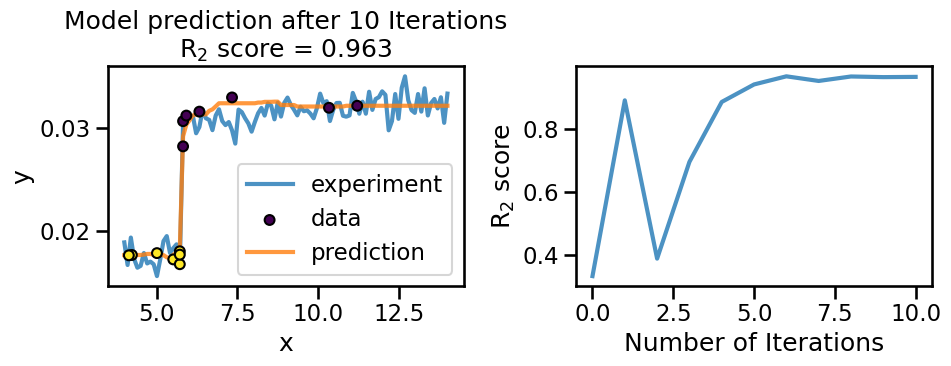

In [5]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(ncols=2, figsize=(10,4))
ax = axes.ravel()[0]
ax.plot(grid, f(grid),lw=3,alpha=0.8, label='experiment')
ax.scatter(bor.X, bor.y, ec='k',s=50, zorder=10, label='data', c=bor.labels)
ax.plot(grid,bor.model.predict(grid.reshape(-1,1)),lw=3,alpha=0.8, label='prediction')
ax.legend()
ax.set_title('Model prediction after %i Iterations\nR$_2$ score = %.3f'%(bor.n_iters, bor.get_r2()))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax = axes.ravel()[1]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
plt.tight_layout()

# 2D fully sequential

In [23]:

Bounds = np.load('systems_2d/Bounds.npy')
Coefs = np.load('systems_2d/Coefs.npy')
X_inits = np.load('systems_2d/X_inits.npy')
y_inits = np.load('systems_2d/y_inits.npy')


i = 451
bound = Bounds[i]
coefs = Coefs[i]
X_init = X_inits[i]
y_init = y_inits[i].ravel()


def get_label(x):
    if x[0]>bound[2]*x[1]+bound[0] and x[1] > bound[3]*x[0]+bound[1]:
        return 0
    else:
        return 1
        
def f(x, fac = 0.001):
    if len(x.shape) == 1:
        x = x.reshape(1,-1)
    labels = np.array([get_label(xi) for xi in x])
    res = np.zeros(x.shape[0])
    res[labels==0] = coefs[0]*(x[:,0][labels==0]-coefs[4])**coefs[2] - coefs[3]
    res[labels==1] = coefs[1]*(x[:,1][labels==1]-coefs[5])**coefs[6] - coefs[7]
    return res + np.random.randn(x.shape[0])*fac


x = y = np.linspace(4,14,50)
X,Y = np.meshgrid(x,y)
grid = np.vstack([X.ravel(), Y.ravel()]).T

x = y = np.linspace(4,14,10)
Xt,Yt = np.meshgrid(x,y)
x_test = np.vstack([Xt.ravel(), Yt.ravel()]).T


In [32]:
bor = BO_RFR(X_init, y_init, grid, f, x_test, gl = get_label, cl_weight=0.3, est_labels='known')
bor.run(40)

generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 21912.67it/s]

running iterative exploration:



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:14<00:00,  2.71it/s]


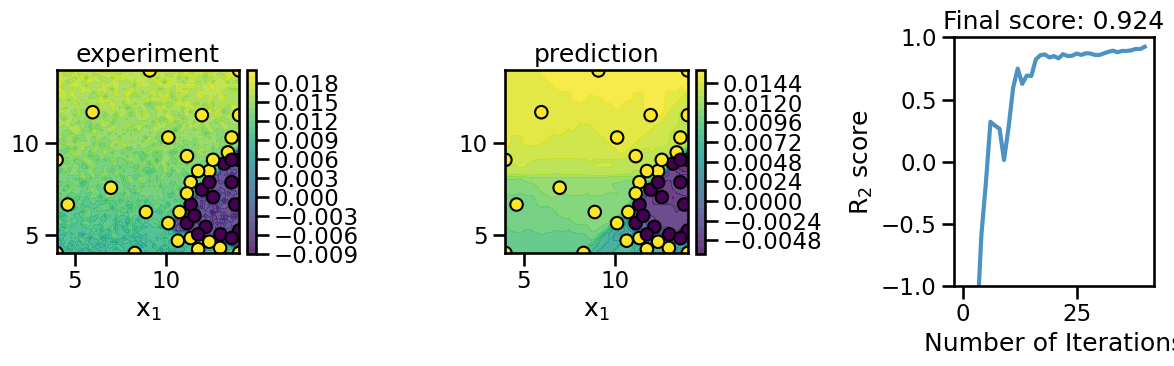

In [33]:
fig,axes = plt.subplots(ncols=3, figsize=(12,4))
ax = axes[0]
a = ax.contourf(X,Y, f(grid).reshape(X.shape), levels=30, alpha=0.8)
plt.colorbar(a,fraction=0.046, pad=0.04)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('experiment')
ax = axes[1]
a = ax.contourf(X,Y, bor.model.predict(grid).reshape(X.shape), levels=30, alpha=0.8)
plt.colorbar(a,fraction=0.046, pad=0.04)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('prediction')
ax = axes[2]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_title('Final score: %.3f'%bor.scores[-1])
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
ax.set_ylim(-1,1)
plt.tight_layout()

# 2D batch

In [11]:
bor = BO_RFR(X_init, y_init, grid, f, x_test, gl = get_label, N_batch=3)

bor.run(10)

generating test data


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 38547.05it/s]

running iterative exploration:



100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.84it/s]


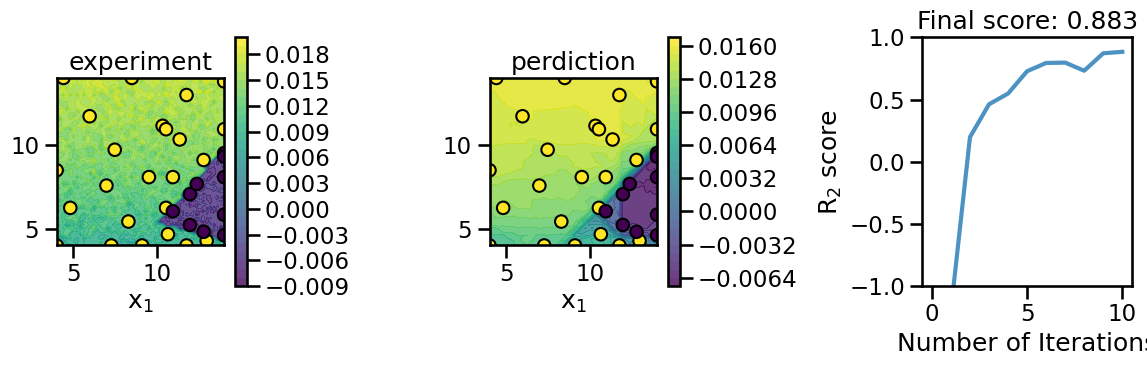

In [12]:
fig,axes = plt.subplots(ncols=3, figsize=(12,4))
ax = axes[0]
a = ax.contourf(X,Y, f(grid).reshape(X.shape), levels=30, alpha=0.8)
plt.colorbar(a)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('experiment')
ax = axes[1]
a = ax.contourf(X,Y, bor.model.predict(grid).reshape(X.shape), levels=30, alpha=0.8)
plt.colorbar(a)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('perdiction')
ax = axes[2]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_title('Final score: %.3f'%bor.scores[-1])
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
ax.set_ylim(-1,1)
plt.tight_layout()

# 1D Multi-step no labels

In [80]:
def f(x):
    if x <= 3:
        res = -3*x+14
    elif x > 3 and x<6:
        res = -1*x**2-5
    elif x >=6 and x <= 8:
        res = 1*x+1
    else:
        res = x**1.5+2.4
    return res + np.random.randn()*0.1

grid = np.linspace(0,10)

np.random.seed(1)

X_init = np.random.rand(4)*10
y_init = np.array([f(xi) for xi in X_init])
x_test = np.linspace(0,10,50)

bor= BO_RFR(X_init.reshape(-1,1), y_init, grid.reshape(-1,1), f, x_test.reshape(-1,1), est_labels='AC', gl=get_label, N_batch=1, 
            k_init=4, k_adaptive=True)
bor.run(30)

generating test data


100%|████████████████████████████████████████| 50/50 [00:00<00:00, 58628.80it/s]

running iterative exploration:



100%|███████████████████████████████████████████| 30/30 [00:07<00:00,  3.84it/s]


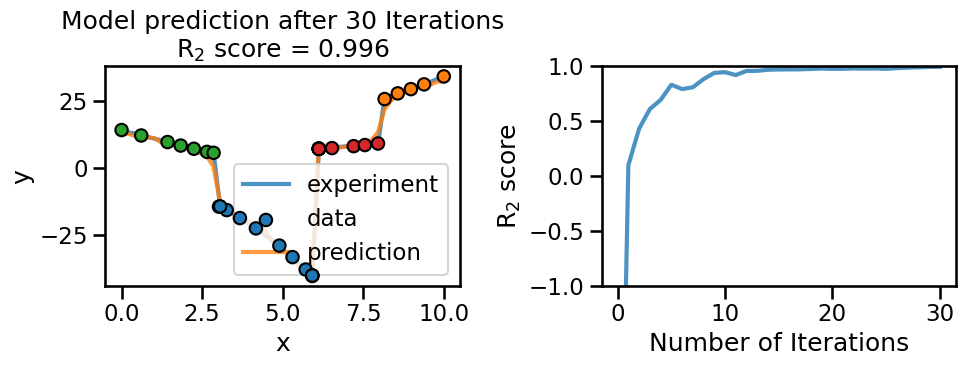

In [81]:
fig,axes = plt.subplots(ncols=2, figsize=(10,4))
ax = axes.ravel()[0]
ax.plot(grid, [f(gi) for gi in grid],lw=3,alpha=0.8, label='experiment')
ax.scatter(bor.X, bor.y, ec='k',s=80, zorder=10, label='data', c=bor.labels, cmap='tab10',vmin=0,vmax=10)
ax.plot(grid,bor.model.predict(grid.reshape(-1,1)),lw=3,alpha=0.8, label='prediction')
ax.legend()
ax.set_title('Model prediction after %i Iterations\nR$_2$ score = %.3f'%(bor.n_iters, bor.get_r2()))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax = axes.ravel()[1]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
ax.set_ylim(-1,1)
plt.tight_layout()